In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4,
cluster_std=0.60, random_state=0)

### Using Own implementation from cluster.py

In [3]:
from cluster import cluster
kMeans = cluster(4)
clusters1, centroids1 = kMeans.fit(X)

### Using SkLearn's KMeans function

In [4]:
from sklearn.cluster import KMeans
sklearn_kmeans = KMeans(n_clusters=4, max_iter=100, random_state=0)
sklearn_clusters = sklearn_kmeans.fit_predict(X)

/Users/aagarwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plotting the results

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### Performance Comparison
- Using V-Measure metric since ground truth is present

In [6]:
from sklearn.metrics import v_measure_score
v_measure_your_kmeans = v_measure_score(cluster_assignments, clusters1)
v_measure_sklearn_kmeans = v_measure_score(cluster_assignments, sklearn_clusters)
print(f'V-Measure (Our custom K-Means): {v_measure_your_kmeans}')
print(f'V-Measure (Scikit-Learn K-Means): {v_measure_sklearn_kmeans}')

V-Measure (Our custom K-Means): 0.993647196794607
V-Measure (Scikit-Learn K-Means): 0.993647196794607


### Using Graph visualizations

-  Custom K-Means and Ground Truth

Text(0.5, 1.0, 'Ground Truth')

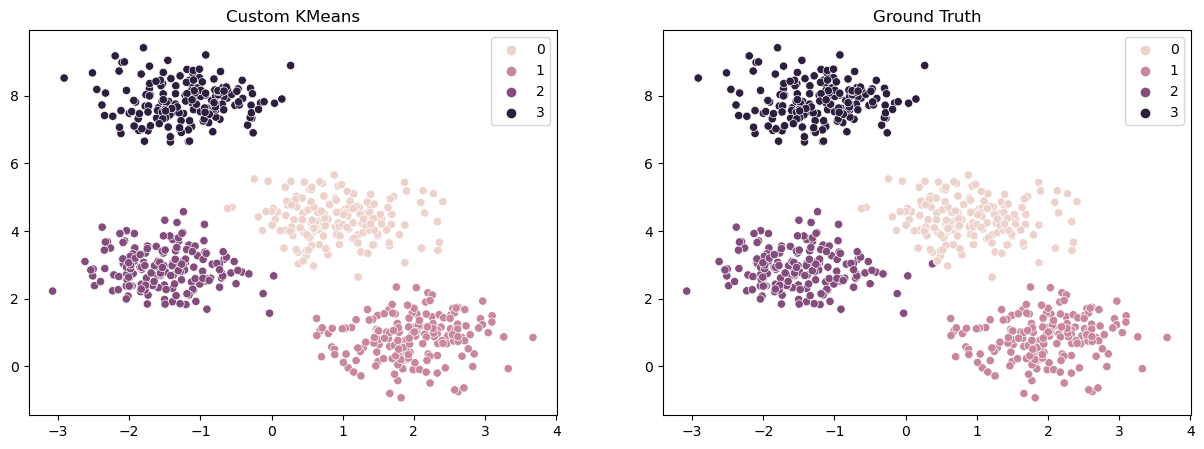

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters1)
plt.title('Custom KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_assignments)
plt.title('Ground Truth')

-  Custom K-Means and SkLearn's K-Means

Text(0.5, 1.0, 'SkLearn KMeans')

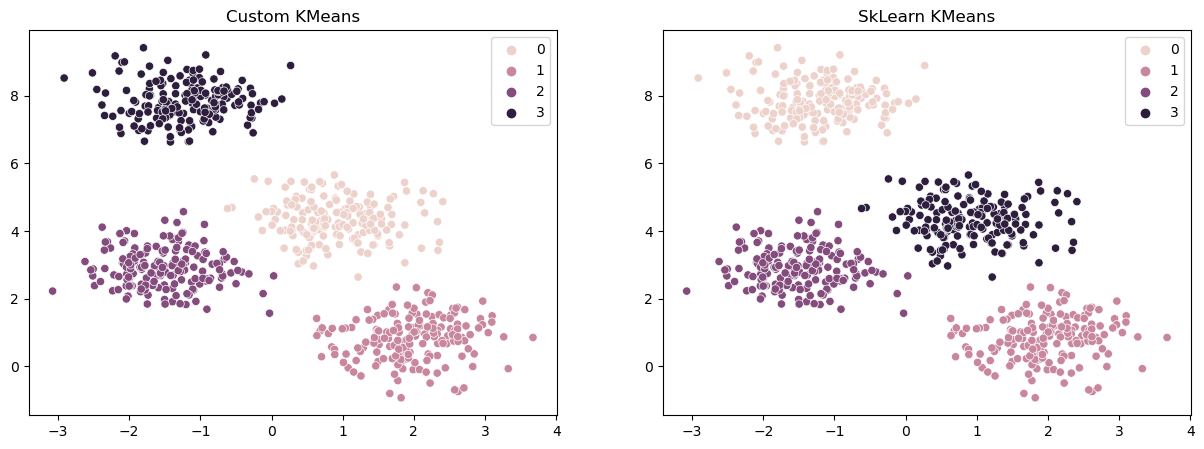

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters1)
plt.title('Custom KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=sklearn_clusters)
plt.title('SkLearn KMeans')

### Balanced K-Means - V-Measure Score and Scatterplot
- We see below that for Extended K-Means, the cluster size is nearly 175 on an average. HEnce, it shows it is a balanced cluster_size.

V-Measure (Our balanced custom K-Means): 0.7737290011996051
Value: 0, Count: 93
Value: 1, Count: 88
Value: 2, Count: 175
Value: 3, Count: 344


Text(0.5, 1.0, 'Balanced Custom KMeans')

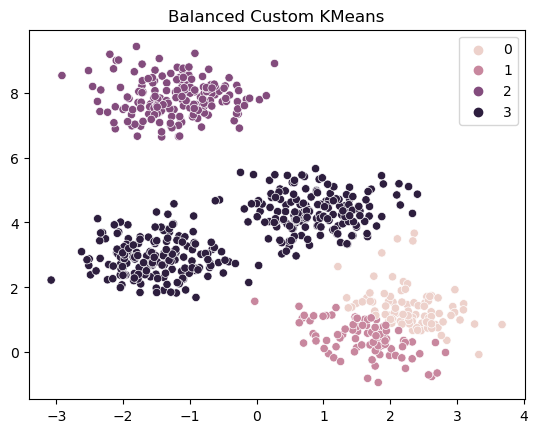

In [9]:
import numpy as np
balanced_kMeans = cluster(4)
balanced_clusters, balanced_centroids = balanced_kMeans.fit(X, balanced=True)

v_measure_balanced_kmeans = v_measure_score(cluster_assignments, balanced_clusters)
print(f'V-Measure (Our balanced custom K-Means): {v_measure_balanced_kmeans}')

unique_values, counts = np.unique(balanced_clusters, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
    
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=balanced_clusters)
plt.title('Balanced Custom KMeans')

## Chicago Taxi Dataset

In [10]:
import pandas as pd
chicago_taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')

In [11]:
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [12]:
chicago_taxi_df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


Check for Missing Values

In [13]:
missing_values_latitude = chicago_taxi_df['Pickup Centroid Latitude'].isnull().sum()
missing_values_latitude

6131

In [14]:
missing_values_longitude = chicago_taxi_df['Pickup Centroid Longitude'].isnull().sum()
missing_values_longitude

6131

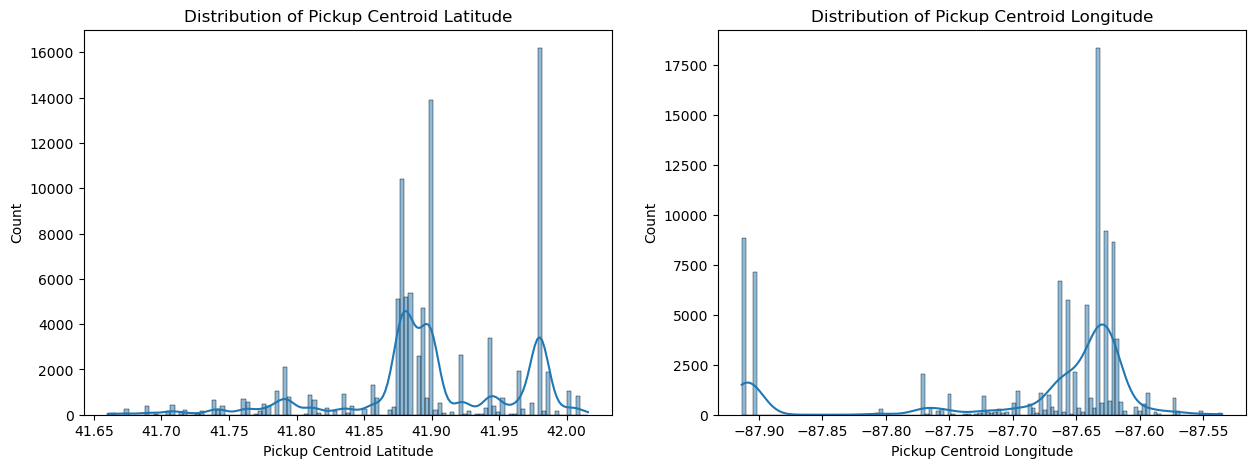

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(chicago_taxi_df['Pickup Centroid Latitude'], kde=True)
plt.title('Distribution of Pickup Centroid Latitude')

plt.subplot(1, 2, 2)
sns.histplot(chicago_taxi_df['Pickup Centroid Longitude'], kde=True)
plt.title('Distribution of Pickup Centroid Longitude')

plt.show()

#### Analysis:
- Pickup Centroid Latitude- Looks like a normal distribution curve skewed towards right 
- Pickup Centroid Longitude - Looks like Power Law distribution

/Users/aagarwal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


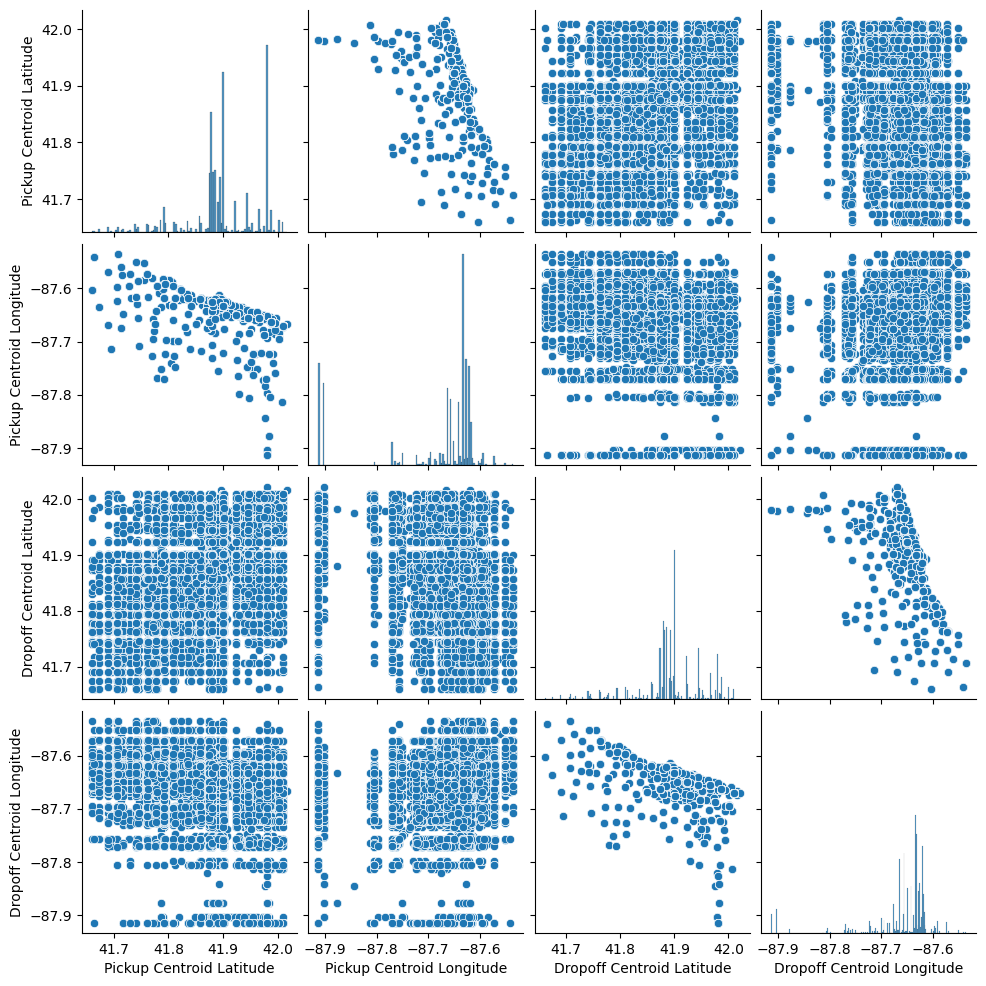

In [16]:
numerical_columns = ['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']
sns.pairplot(chicago_taxi_df, vars = numerical_columns)
plt.show()

<Axes: >

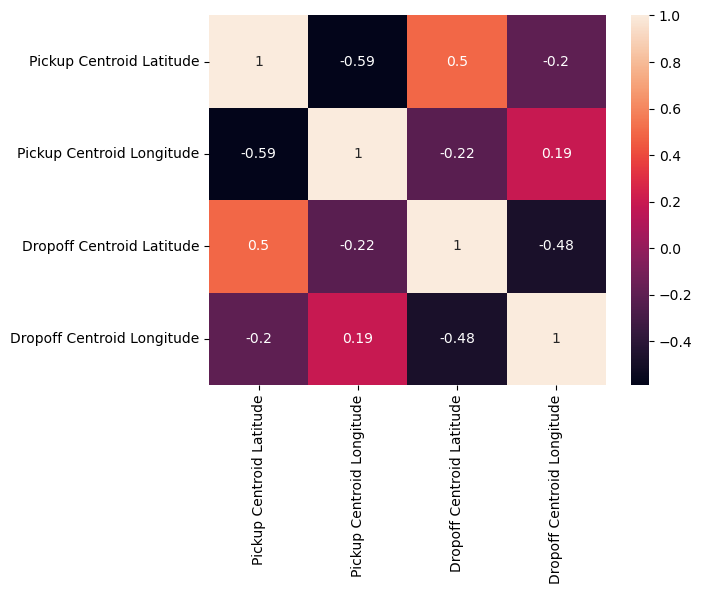

In [17]:
sns.heatmap(chicago_taxi_df[numerical_columns].corr(), annot = True)

#### Analysis from pairplot and heat map: Following are the observations:
- Pickup Centroid Latitude and Logitude are negatively correlated to each other just like dropoff centroid latitude and longitude. This means that of pickup latitude increases, pickup longitude values decreases.
- We can also see in pairplots how Chicago state is clearly marked where maximum pickup and drops happened around chicago north right side of sea ports.

#### Pre-processing of the data: 
We will use the latitude and longitude information (pickup or dropoff location coordinates) for clustering.
Since the data is incomplete for centroid latitude and longitude values, we drop these rows.Remove the NaN values for doing clustering

In [18]:
chicago_taxi_df.dropna(subset=['Pickup Centroid Latitude'], inplace=True)
chicago_taxi_df.dropna(subset=['Pickup Centroid Longitude'], inplace=True)

In [19]:
import numpy as np
coordinates = np.array(chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']])

### K-Means Clustering - Chicago Dataset
* For the Chicago taxi data, I have used K-Means clustering since it is a common and widely-used clustering algorithm, and it is suitable for geographical data

- Hyperparameter settings- Number of clusters are 3

/Users/aagarwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'KMeans Clustering of Chicago Taxi Dataset')

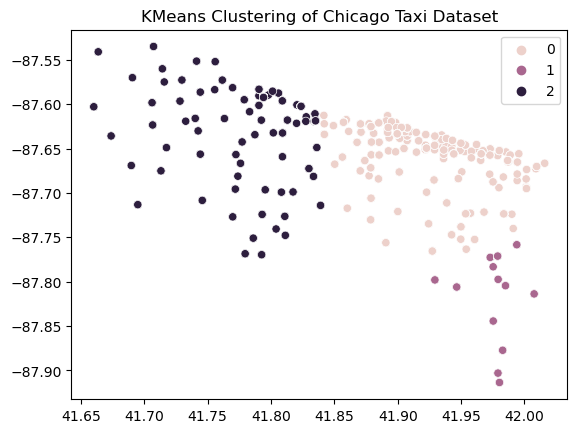

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_cluster = kmeans.fit_predict(coordinates)
sns.scatterplot(x=coordinates[:, 0], y=coordinates[:, 1], hue=kmeans_cluster)
plt.title('KMeans Clustering of Chicago Taxi Dataset')

### DBSCAN Clustering - Chicago Dataset

- Hyperparameter settings- eps (maximum distance between two samples for one to be considered as in the neighborhood of the other) = 0.01 and min_samples (the number of samples in a neighborhood for a point to be considered as a core point) = 5

Text(0.5, 1.0, 'DBSCAN Clustering of Chicago Taxi Dataset')

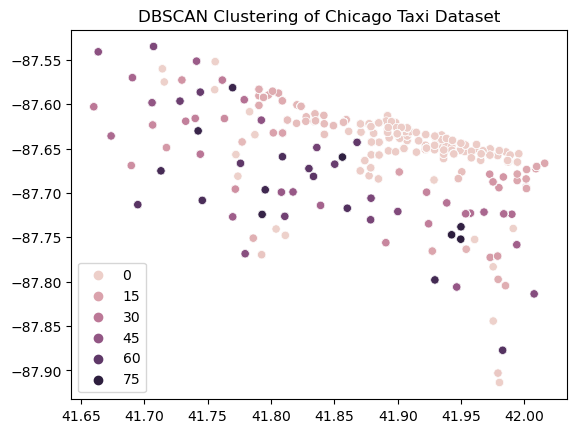

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=5)
dbscan_cluster = dbscan.fit_predict(coordinates)
sns.scatterplot(x=coordinates[:, 0], y=coordinates[:, 1], hue=dbscan_cluster)
plt.title('DBSCAN Clustering of Chicago Taxi Dataset')

### Evaluate clustering using Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(coordinates, kmeans_cluster)
print(f'Silhouette Score (K-Means): {silhouette_kmeans}')

Silhouette Score (K-Means): 0.6803588068403978


Here, I have used the metrics as Silhouette Score for K-Means because ground truth or labels are not provided for Chicago Taxi dataset.
- Silhouette Score of 0.68 indicates that clusters are well defined and there is a clear separation between clusters.
-  Result is as expected.

In [23]:
silhouette_dbscan = silhouette_score(coordinates, dbscan_cluster)
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')

Silhouette Score (DBSCAN): 0.28271330248388526


Here, I have used the metrics as Silhouette Score for DBSCAN because ground truth or labels are not provided for Chicago Taxi dataset.
- Silhouette Score of 0.28 indicates that clusters are not well defined and we can also see there is negligible clear separation among clusters.
-  Result is not as expected as I thought this would give better results.

### Mopsi Dataset
- No headers present 
- As mentioned on the website, that these both column represent latitude and longitude. Hence, adding the headers respectively.

In [24]:
mopsi_df = pd.read_csv("mopsi_data.txt", sep='\t', header=None, names=['Latitude','Longitude'])
mopsi_df

,Latitude,Longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [25]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Latitude   13467 non-null  int64
 1   Longitude  13467 non-null  int64
dtypes: int64(2)
memory usage: 210.6 KB


In [26]:
mopsi_df.describe() 

,Latitude,Longitude
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


<Axes: xlabel='Longitude', ylabel='Latitude'>

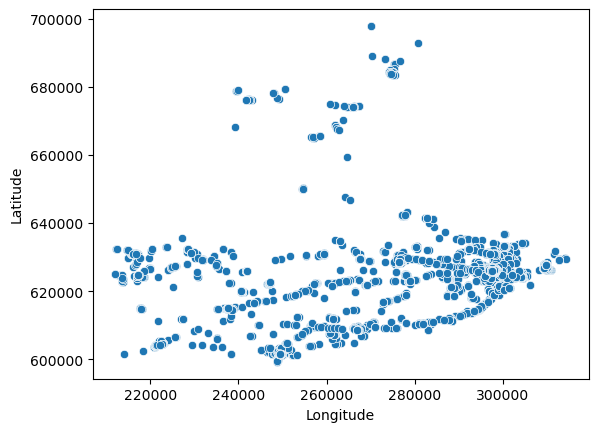

In [27]:
sns.scatterplot(data=mopsi_df, x="Longitude", y="Latitude")

#### Analysis:
- Looks like a superbusy routes with latitude ranging from 600000 and 640000 while longitude ranging from 220000 to 300000, Assuming must be like a city center where offices, shopping centers, hospitals or other tourist places are present.
- Data is also complete since no null values are present.

### K-Means Clustering - Mopsi Dataset
- Hyperparameter settings- Number of clusters are 3

/Users/aagarwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'KMeans Clustering of Mopsi Dataset')

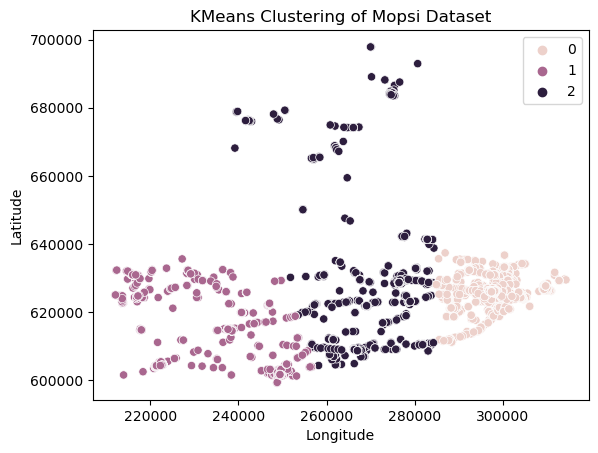

In [28]:
features = ['Latitude', 'Longitude']
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_cluster = kmeans.fit_predict(mopsi_df[features])
sns.scatterplot(x=mopsi_df[features[1]], y=mopsi_df[features[0]], hue=kmeans_cluster)
plt.title('KMeans Clustering of Mopsi Dataset')

### Evaluate clustering using Silhouette Score

In [29]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(mopsi_df[features], kmeans_cluster)
print(f'Silhouette Score (K-Means): {silhouette_kmeans}')

Silhouette Score (K-Means): 0.8015256665857015


Here, I have used the metrics as Silhouette Score for K-Means because ground truth or labels are not provided for Mopsi dataset.
- Silhouette Score of 0.8 indicates that clusters are well defined and there is a clear separation between clusters.
-  Result is as expected.

### DBSCAN Clustering - Mopsi Dataset

- Hyperparameter settings- eps (maximum distance between two samples for one to be considered as in the neighborhood of the other) = 1300 and min_samples (the number of samples in a neighborhood for a point to be considered as a core point) = 5
- No pre-processing required

Text(0.5, 1.0, 'DBSCAN Clustering of Mopsi Dataset')

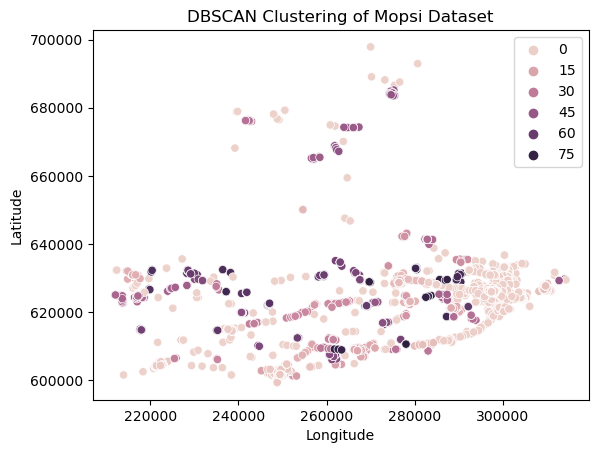

In [30]:
dbscan = DBSCAN(eps=1300, min_samples=5)
dbscan_cluster = dbscan.fit_predict(mopsi_df[features])
sns.scatterplot(x=mopsi_df[features[1]], y=mopsi_df[features[0]], hue=dbscan_cluster)
plt.title('DBSCAN Clustering of Mopsi Dataset')

### Evaluate clustering using Silhouette Score

In [31]:
silhouette_dbscan = silhouette_score(mopsi_df[features], dbscan_cluster)
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')

Silhouette Score (DBSCAN): 0.6727842548056174


Here, I have used the metrics as Silhouette Score for DBSCAN because ground truth or labels are not provided for Mopsi dataset.
- Silhouette Score of 0.67 indicates that clusters are well defined  butnot as good as shown in K-Means. 
- Interesting observation: for hyperparameter values of eps = 1 or less, the silhouette score is closer to -1 and also for eps >1350, silhouette score starts decreasing. It is observed to be maximum at 1300.
-  Result is not as expected as I thought.

## Citations

* https://saturncloud.io/blog/pandas-valueerror-cannot-convert-float-nan-to-integer/#:~:text=Solution%201%3A%20Replace%20NaN%20Values,fillna()%20function%20in%20Pandas.&text=This%20code%20first%20fills%20any,using%20the%20fillna()%20function
* https://medium.com/analytics-vidhya/clustering-taxi-geolocation-data-to-predict-location-of-taxi-service-stations-pt-1-2471303e0965
* https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/
* http://cs.uef.fi/mopsi/routes/dataset/